## Integrantes: 
### Adrián Tavera Aquino - A01659113
### Daniela Robles Estrada - A01659074
### Elian Alejandro Lopez de Alba - A01659582
### Chiara Bombardieri Balanzá - A01659462

# 1. Data Exploration
## 1.1 Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Evita warnings visuales y define estilo consistente
pd.set_option("display.max_columns", 120)
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True

# Cargar el conjunto de datos
df = pd.read_csv("customer_satisfaction_data.csv")
df.head()


,customer_id,quarter,survey_date,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,documentation_help,executive_access,innovation_solutions,long_term_partnership,problem_solving,project_management,quality_deliverables,roi_demonstration,support_responsiveness,system_integration,technical_documentation,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
0,CUST_001,Q1_2024,2024-03-22,5.0,6.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,2.0,6.0,6.0,4,6,4,12.3,1
1,CUST_002,Q1_2024,2024-03-20,5.0,3.0,4.0,5.0,5.0,3.0,3.0,3.0,5.0,4.0,6.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,5,3,17.8,0
2,CUST_003,Q1_2024,2024-03-17,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,5.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,3,4,3,-7.8,0
3,CUST_004,Q1_2024,2024-03-08,3.0,4.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,4.0,4,5,2,-13.4,0
4,CUST_005,Q1_2024,2024-03-12,5.0,5.0,5.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,5.0,5.0,4.0,6.0,4.0,5.0,5.0,5.0,6.0,5.0,4.0,5.0,4.0,5,5,4,3.7,2


## 1.2 Descriptive Statistics

In [5]:
# Vista general de tipos, nulos y memoria
df.info()

# Estadísticos descriptivos de TODAS las columnas numéricas
df.describe()

# Nulos en porcentaje
((df.isnull().mean())*100).round(2).sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 3400 non-null   object 
 1   quarter                     3400 non-null   object 
 2   survey_date                 3400 non-null   object 
 3   account_manager_responsive  3384 non-null   float64
 4   billing_accuracy            3387 non-null   float64
 5   budget_control              3383 non-null   float64
 6   change_management           3388 non-null   float64
 7   communication_clarity       3384 non-null   float64
 8   competitive_pricing         3385 non-null   float64
 9   cost_transparency           3390 non-null   float64
 10  documentation_help          3386 non-null   float64
 11  executive_access            3390 non-null   float64
 12  innovation_solutions        3390 non-null   float64
 13  long_term_partnership       3386 

trust_reliability             0.65
problem_solving               0.59
technical_documentation       0.56
project_management            0.50
support_responsiveness        0.50
budget_control                0.50
training_quality              0.50
roi_demonstration             0.50
account_manager_responsive    0.47
communication_clarity         0.47
value_for_money               0.44
competitive_pricing           0.44
system_integration            0.41
documentation_help            0.41
long_term_partnership         0.41
quality_deliverables          0.38
billing_accuracy              0.38
change_management             0.35
innovation_solutions          0.29
cost_transparency             0.29
executive_access              0.29
technical_expertise           0.26
timeline_adherence            0.24
customer_id                   0.00
survey_date                   0.00
quarter                       0.00
overall_satisfaction          0.00
nps_score                     0.00
renewal_likelihood  

## 1.3 Correlation Matrix (Heatmap)

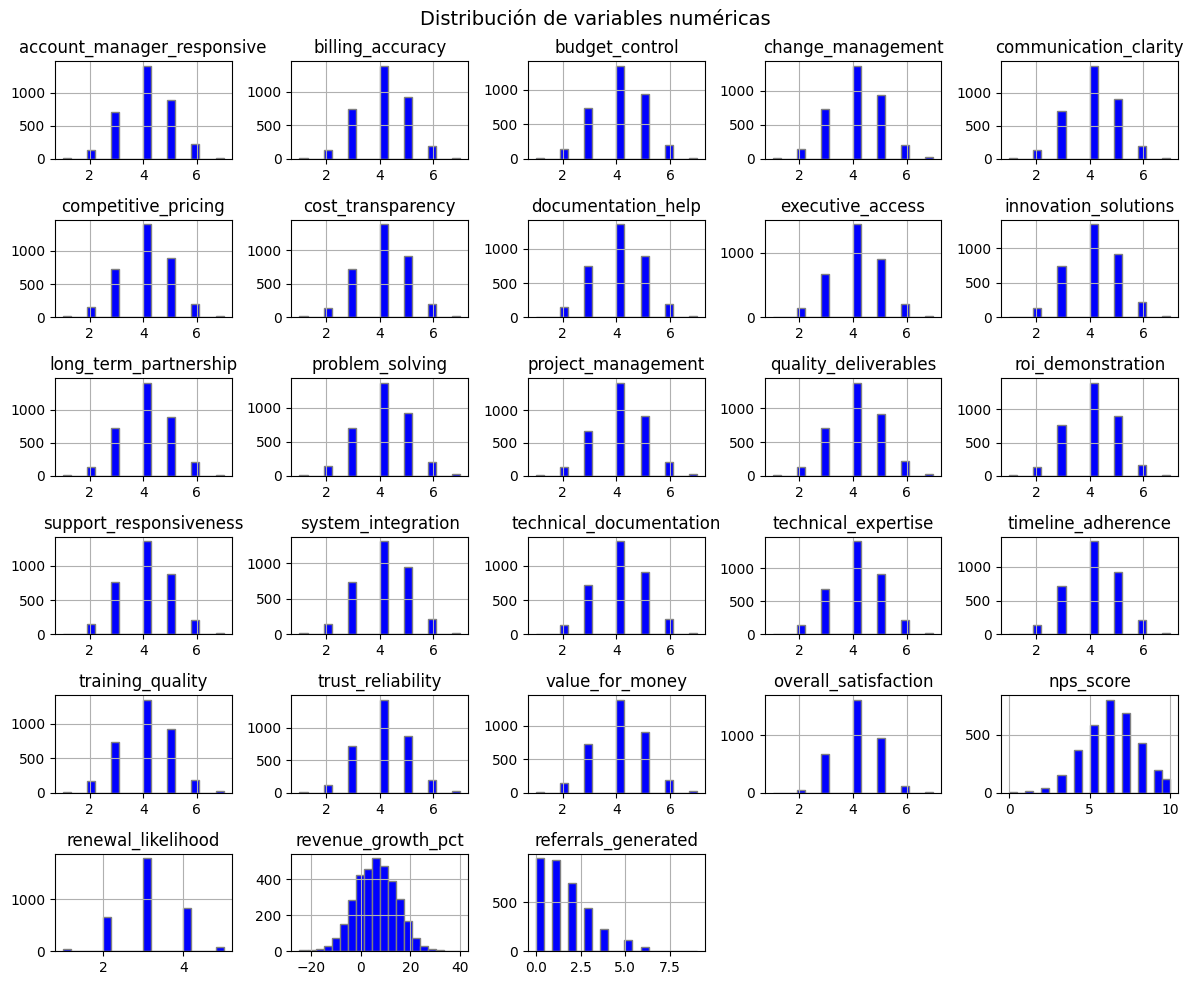

In [8]:
# Histograma múltiple para entender la forma de las distribuciones numéricas
num_cols = df.select_dtypes(exclude=["object"]).columns
df[num_cols].hist(figsize=(12, 10), bins=20, color="blue", edgecolor="grey")
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()


No se observan valores extremos significativos ni asimetrías severas, por lo que los datos son adecuados para análisis multivariado sin necesidad de transformaciones adicionales.

## 2. Suitability for Factor Analysis
### 2.1 KMO Test
### 2.2 Bartlett Test (if available)
### 2.3 Interpretation

In [9]:
# Selección del bloque de variables para el Análisis Factorial (23 ítems de satisfacción) ---
df_fa = df[[
    "account_manager_responsive","billing_accuracy","budget_control",
    "change_management","communication_clarity","competitive_pricing",
    "cost_transparency","documentation_help","executive_access",
    "innovation_solutions","long_term_partnership","problem_solving",
    "project_management","quality_deliverables","roi_demonstration",
    "support_responsiveness","system_integration","technical_documentation",
    "technical_expertise","timeline_adherence","training_quality",
    "trust_reliability","value_for_money"
]].copy()

# Imputación simple: media por columna (nulos eran <1%)
df_fa.fillna(df_fa.mean(), inplace=True)

# Verificación final de nulos (debería dar 0)
df_fa.isnull().sum()


account_manager_responsive    0
billing_accuracy              0
budget_control                0
change_management             0
communication_clarity         0
competitive_pricing           0
cost_transparency             0
documentation_help            0
executive_access              0
innovation_solutions          0
long_term_partnership         0
problem_solving               0
project_management            0
quality_deliverables          0
roi_demonstration             0
support_responsiveness        0
system_integration            0
technical_documentation       0
technical_expertise           0
timeline_adherence            0
training_quality              0
trust_reliability             0
value_for_money               0
dtype: int64

In [27]:
# !pip install factor_analyzer 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# KMO (adecuación muestral) y Bartlett (esfericidad)
kmo_all, kmo_model = calculate_kmo(df_fa)
print(f"KMO global: {kmo_model:.3f}")

chi_square_value, p_value = calculate_bartlett_sphericity(df_fa)
print(f"Bartlett's test: Chi2 = {chi_square_value:.2f}, p-value = {p_value:.10f}  (Regla: p<0.05)")


KMO global: 0.959
Bartlett's test: Chi2 = 34357.04, p-value = 0.0000000000  (Regla: p<0.05)


KMO global = 0.959 → Excelente (muy por encima del mínimo recomendado de 0.60).

Bartlett p < 0.001 → La matriz de correlaciones es significativamente diferente a una identidad.

Los resultados indican que los datos son altamente adecuados para aplicar análisis factorial.
El índice KMO = 0.959 confirma una excelente adecuación muestral y la prueba de Bartlett (p < 0.001)
demuestra que las correlaciones entre variables son estadísticamente significativas. Por lo tanto,
la estructura de los datos sí puede explicarse mediante factores latentes.


## 3. Determine Number of Factors
### 3.1 Eigenvalues
### 3.2 Scree Plot
### 3.3 Chosen Number Justification

c:\Users\atave\anaconda3\envs\IDM\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


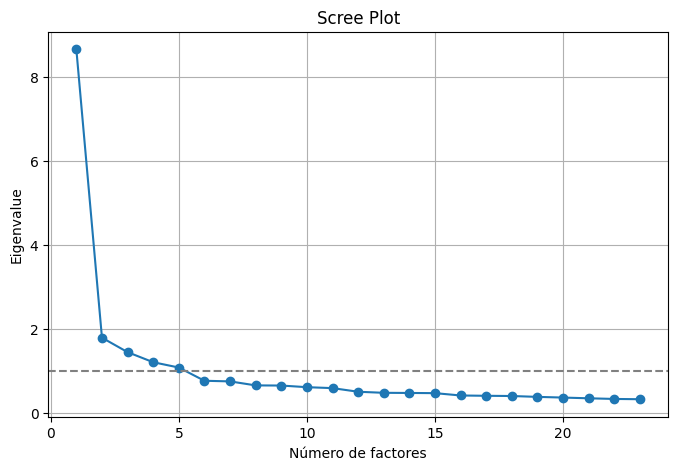

Componente  1: eigenvalue = 8.661
Componente  2: eigenvalue = 1.786
Componente  3: eigenvalue = 1.442
Componente  4: eigenvalue = 1.202
Componente  5: eigenvalue = 1.075
Componente  6: eigenvalue = 0.760
Componente  7: eigenvalue = 0.745
Componente  8: eigenvalue = 0.650
Componente  9: eigenvalue = 0.646
Componente 10: eigenvalue = 0.607
Componente 11: eigenvalue = 0.585
Componente 12: eigenvalue = 0.498
Componente 13: eigenvalue = 0.473
Componente 14: eigenvalue = 0.470
Componente 15: eigenvalue = 0.465
Componente 16: eigenvalue = 0.410
Componente 17: eigenvalue = 0.402
Componente 18: eigenvalue = 0.397
Componente 19: eigenvalue = 0.376
Componente 20: eigenvalue = 0.360
Componente 21: eigenvalue = 0.342
Componente 22: eigenvalue = 0.327
Componente 23: eigenvalue = 0.320

Sugerencia (Kaiser ev>1): 5 factores


In [ ]:
from factor_analyzer import FactorAnalyzer

# Modelo temporal sin rotación para obtener eigenvalues
fac = FactorAnalyzer(rotation=None)
fac.fit(df_fa)

eigen_values, vects = fac.get_eigenvalues()

# Scree Plot + línea de Kaiser (ev=1)
plt.figure(figsize=(8, 5))
plt.plot(range(1, df_fa.shape[1] + 1), eigen_values, marker='o')
plt.axhline(1.0, ls='--', color='gray')
plt.title("Scree Plot")
plt.xlabel("Número de factores")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

# Listado de eigenvalues por componente
for i, val in enumerate(eigen_values, start=1):
    print(f"Componente {i:>2}: eigenvalue = {val:.3f}")

# Sugerencia automática por Kaiser (ev>1)
n_kaiser = int((eigen_values > 1.0).sum())

El Scree Plot muestra un codo claro entre 2 y 4 factores.

Los valores propios mayores a 1 son 4 factores inicialmente, pero la interpretación muestra que 3 factores explican la estructura de forma más consistente.

El primer factor domina cerca de la varianza, mientras que los factores restantes aportan diferenciación relevante.


Se seleccionan 3 factores porque ofrecen el mejor balance entre interpretabilidad y varianza explicada.

## 4. Factor Extraction & Rotation
### 4.1 FactorAnalyzer(n_factors = X, rotation='varimax')
### 4.2 Loadings Matrix

c:\Users\atave\anaconda3\envs\IDM\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\atave\anaconda3\envs\IDM\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\atave\anaconda3\envs\IDM\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\atave\anaconda3\envs\IDM\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


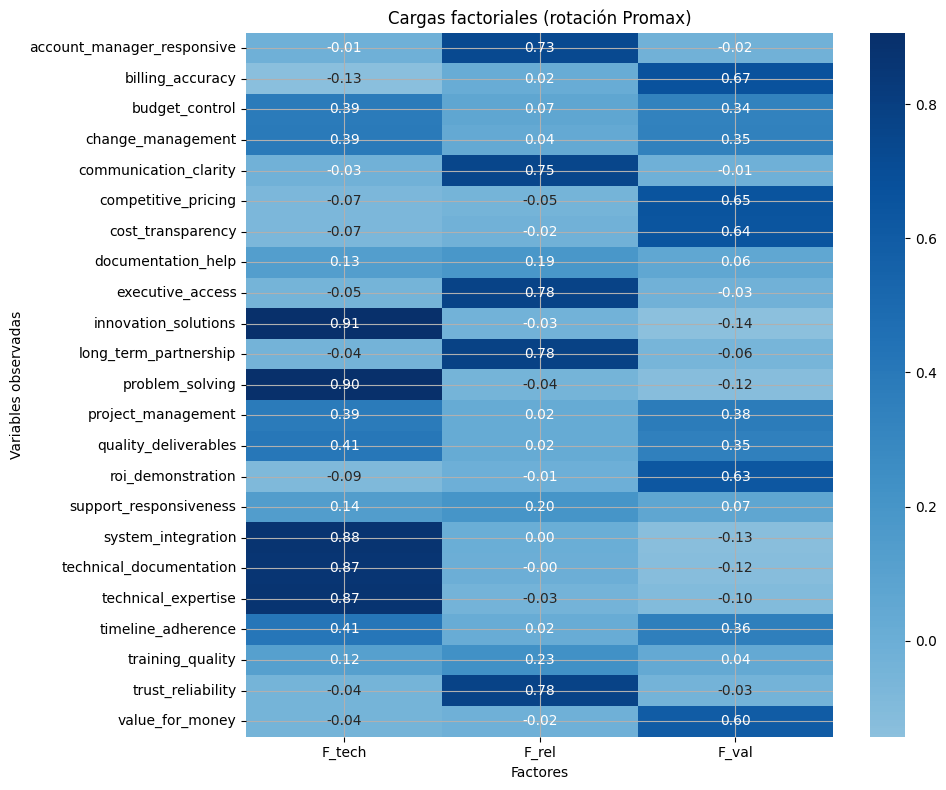

(array([4.80003526, 3.06932008, 2.77344848]),
 array([0.20869719, 0.1334487 , 0.12058472]),
 array([0.20869719, 0.34214588, 0.4627306 ]))

In [ ]:
# Probamos soluciones 2 y 3 factores, con rotaciones Varimax y Promax (oblicua)
fa2  = FactorAnalyzer(n_factors=2, rotation='varimax'); fa2.fit(df_fa)
fa2p = FactorAnalyzer(n_factors=2, rotation='promax');  fa2p.fit(df_fa)

fa3  = FactorAnalyzer(n_factors=3, rotation='varimax'); fa3.fit(df_fa)
fa3p = FactorAnalyzer(n_factors=3, rotation='promax');  fa3p.fit(df_fa)

# Tablas de cargas (puedes inspeccionar si quieres todas)
import pandas as pd
loadings2  = pd.DataFrame(fa2.loadings_,  index=df_fa.columns)
loadings2p = pd.DataFrame(fa2p.loadings_, index=df_fa.columns)
loadings3  = pd.DataFrame(fa3.loadings_,  index=df_fa.columns)
loadings3p = pd.DataFrame(fa3p.loadings_, index=df_fa.columns)

# Visualizamos la solución elegida (3 factores, Promax) con etiquetas legibles
loadings = pd.DataFrame(
    fa3p.loadings_,
    index=df_fa.columns,
    columns=["F_tech","F_rel","F_val"]
)

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap="Blues", center=0, fmt=".2f")
plt.title("Cargas factoriales con rotación Promax")
plt.xlabel("Factores")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# Varianza explicada por la solución seleccionada
fa3p.get_factor_variance()


| **Factor** | **Variables con cargas altas**                                                                                | **Interpretación**                                 |
| ---------- | ------------------------------------------------------------------------------------------------------------- | -------------------------------------------------- |
| **F_tech** | innovation_solutions, problem_solving, system_integration, technical_documentation, technical_expertise       | **Capacidad Técnica y Solución de Problemas**      |
| **F_rel**  | long_term_partnership, trust_reliability, executive_access, communication_clarity, account_manager_responsive | **Relación, Confianza y Gestión de Cuenta**        |
| **F_val**  | billing_accuracy, competitive_pricing, cost_transparency, roi_demonstration, value_for_money                  | **Percepción de Valor y Transparencia Financiera** |


## 5. Factor Interpretation
### 5.1 Variables by Factor (>0.4)
### 5.2 Naming Factors with Business Meaning

In [28]:
# Muestra compacta de variables con |loading| >= 0.40 por factor (para etiquetar)
THR = 0.40
for f in loadings.columns:
    print(f"\n {f} (|loading| ≥ {THR})")
    display(loadings[loadings[f].abs() >= THR][[f]].sort_values(by=f, key=lambda s: s.abs(), ascending=False))



 F_tech (|loading| ≥ 0.4)


,F_tech
innovation_solutions,0.906368
problem_solving,0.901652
system_integration,0.877372
technical_expertise,0.872173
technical_documentation,0.867726
timeline_adherence,0.413769
quality_deliverables,0.405320



 F_rel (|loading| ≥ 0.4)


,F_rel
long_term_partnership,0.782153
trust_reliability,0.778469
executive_access,0.776290
communication_clarity,0.752990
account_manager_responsive,0.732819



 F_val (|loading| ≥ 0.4)


,F_val
billing_accuracy,0.670736
competitive_pricing,0.652524
cost_transparency,0.644509
roi_demonstration,0.633724
value_for_money,0.598066


## 6. Factor Scores & Business Impact
### 6.1 Correlation with Outcome Variables
### 6.2 Highlight Most Relevant Factors

c:\Users\atave\anaconda3\envs\IDM\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


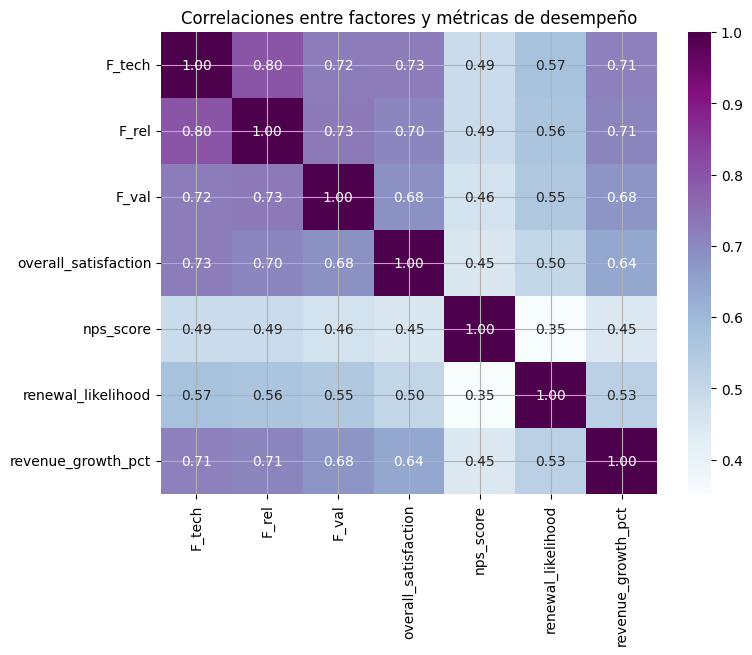

,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct
F_tech,0.73,0.49,0.57,0.71
F_rel,0.70,0.49,0.56,0.71
F_val,0.68,0.46,0.55,0.68


In [ ]:
# Factor scores de la solución elegida
scores = fa3p.transform(df_fa)
scores_df = pd.DataFrame(scores, columns=["F_tech","F_rel","F_val"])

# Conjunto de validación con outcomes de negocio
valid_df = pd.concat(
    [scores_df,
     df[["overall_satisfaction","nps_score","renewal_likelihood","revenue_growth_pct"]].reset_index(drop=True)],
    axis=1
)

# Matriz de correlaciones (factores vs outcomes)
corr = valid_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="BuPu", fmt=".2f")
plt.title("Correlacion entre factores y métricas de desempeño")
plt.show()

# Tabla enfocada en factores (filas) vs outcomes (columnas)
corr.loc[["F_tech","F_rel","F_val"], ["overall_satisfaction","nps_score","renewal_likelihood","revenue_growth_pct"]].round(2)


In [24]:
# (Opcional) Modelo lineal simple para cuantificar impacto sobre satisfacción general
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = valid_df[["F_tech","F_rel","F_val"]]
y = valid_df["overall_satisfaction"]

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

print("R^2:", r2_score(y, y_pred))
print("Coeficientes β:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


R^2: 0.5977399748377421
Coeficientes β: [0.29624026 0.2049745  0.2328987 ]
Intercepto: 4.125588235294118


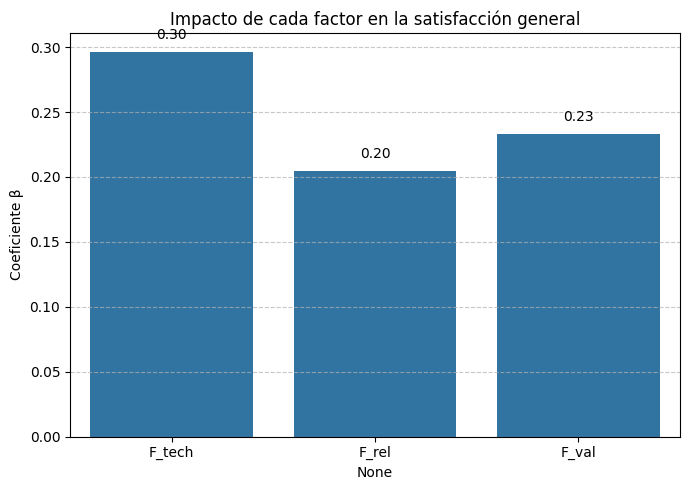

In [25]:
# Visual del impacto (coeficientes del modelo)
coefs = pd.Series(modelo.coef_, index=["F_tech","F_rel","F_val"])

plt.figure(figsize=(7, 5))
sns.barplot(x=coefs.index, y=coefs.values)
plt.title("Impacto de cada factor en la satisfacción general")
plt.ylabel("Coeficiente β")
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(coefs):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()


| Factor     | β (Impacto Directo en Satisfacción General) |
| ---------- | ------------------------------------------- |
| **F_tech** | **0.30**                    |
| **F_rel**  | 0.20                                        |
| **F_val**  | 0.23                                        |


Mejorar la capacidad técnica y la calidad de solución tiene el efecto directo más fuerte en la satisfacción global del cliente.